# Credit Risk Handling Project 

## Import libaries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import time


## Dataset Creation

In [2]:
df_customers = pd.read_csv(r'E:\Machine Learning\Credit Risk Handling Project\Dataset\customers.csv')
df_Loans = pd.read_csv(r'E:\Machine Learning\Credit Risk Handling Project\Dataset\loans.csv')
df_bureau = pd.read_csv(r'E:\Machine Learning\Credit Risk Handling Project\Dataset\bureau_data.csv')

In [3]:
df_bureau.shape, df_customers.shape, df_Loans.shape

((50000, 8), (50000, 12), (50000, 15))

In [4]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
df_Loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [6]:
df_bureau.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [7]:
df_merged = pd.merge(df_customers, df_Loans, on='cust_id')
df_merged.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [8]:
df = pd.merge(df_merged, df_bureau, on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default'] = df['default'].astype(int)
print(df.shape)
df.head(2)


(50000, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


In [11]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [12]:
df['residence_type'].value_counts()

residence_type
Owned       28238
Mortgage    11819
Rented       9881
Name: count, dtype: int64

### Train/Test Split

In [13]:
X = df.drop(columns='default', axis=1)
y = df['default']

# To avoid data leakage we split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test= pd.concat([X_test, y_test], axis='columns')
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

## Handling Missing and Duplicate values

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode = df_train.residence_type.mode()[0]
mode

'Owned'

In [17]:
df_train['residence_type'].fillna(mode, inplace=True)
df_train['residence_type'].unique()

C:\Users\joyal\AppData\Local\Temp\ipykernel_9580\301002361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
df_test['residence_type'].fillna(mode, inplace=True)
df_test['residence_type'].unique()

C:\Users\joyal\AppData\Local\Temp\ipykernel_9580\1290523630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode, inplace=True)


array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [19]:
df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [21]:
columns_continuous = df.select_dtypes([ 'int64', 'float64']).columns
columns_continuous

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

In [22]:
columns_categorical = df.select_dtypes([ 'object']).columns
columns_categorical

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [23]:
columns_continuous = ['cust_id', 'age',
       'income', 'number_of_dependants', 
       'years_at_current_address',  'loan_id',
        'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default' ]

## visulaize outliers

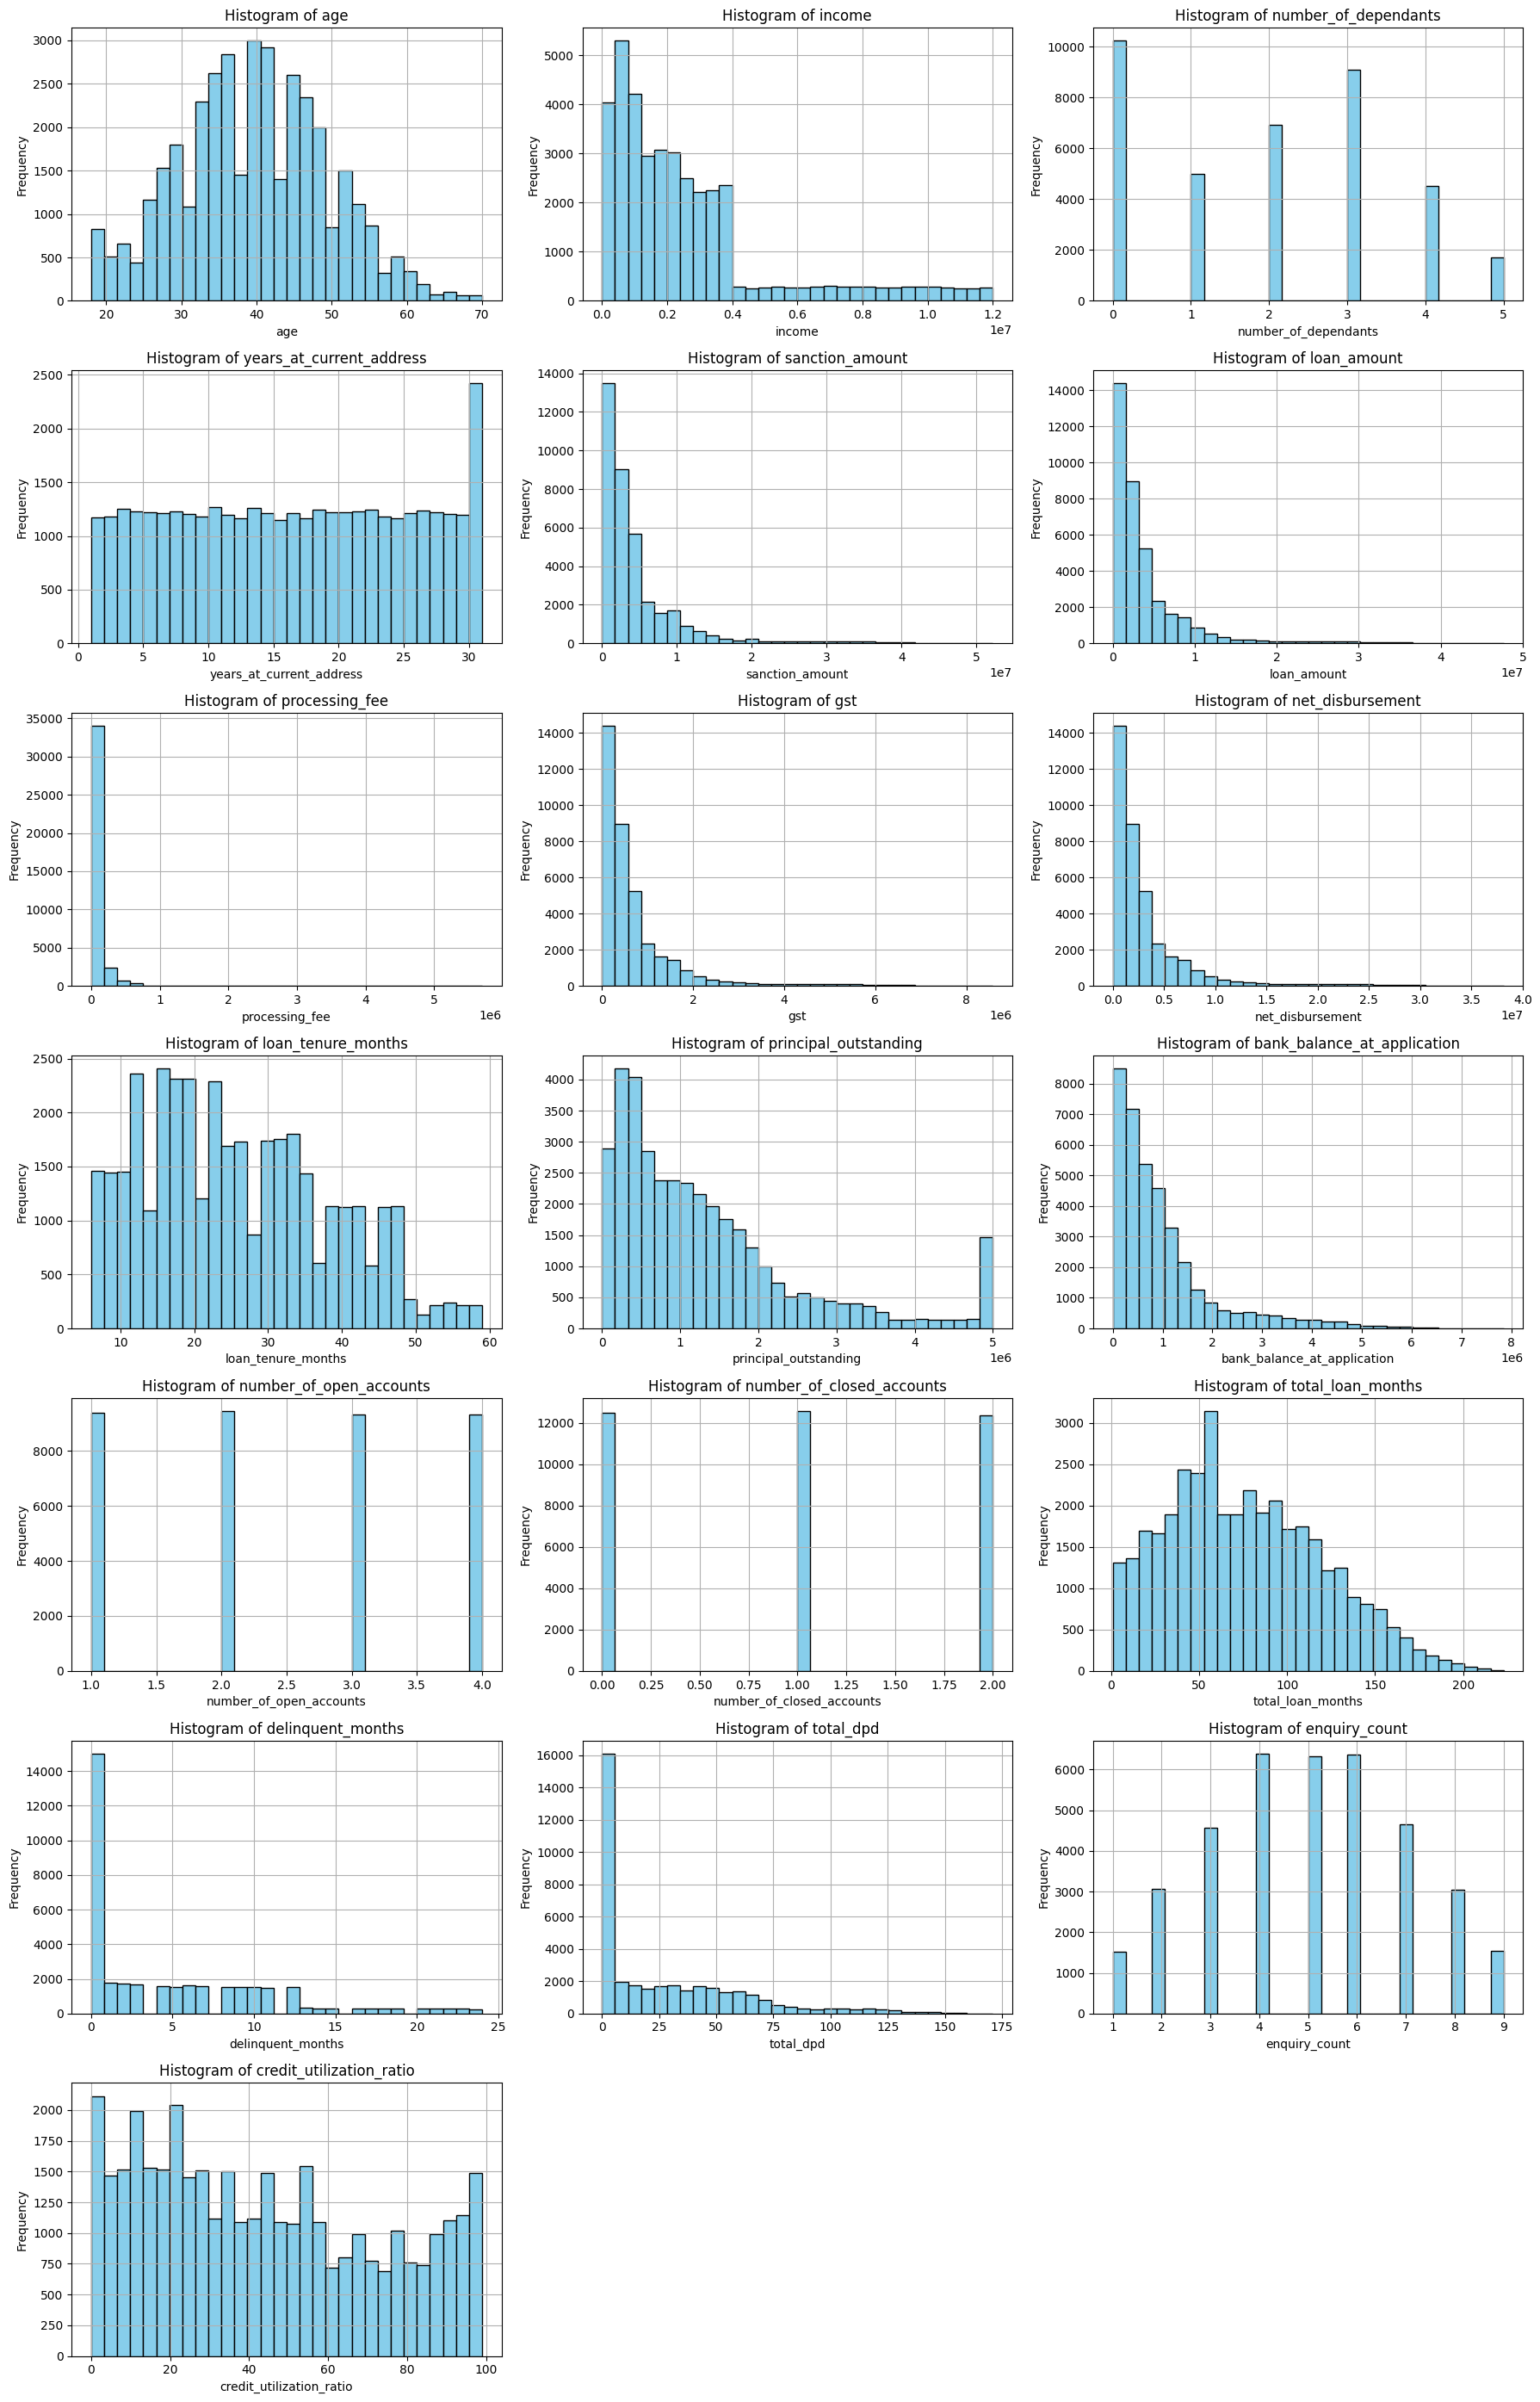

In [24]:
# Filter only numeric columns (skip datetime)
plot_cols = [col for col in columns_continuous if df_train[col].dtype in ['int64', 'float64']]

# Define subplot grid
n_cols = 3
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(plot_cols):
    df_train[col].dropna().hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outlier Removal: processing Fee

In [25]:
df_train['processing_fee'].describe().astype(int)

count      37500
mean       80724
std       120830
min            0
25%        19180
50%        44700
75%        92000
max      5698029
Name: processing_fee, dtype: int64

In [26]:
df_train[df_train['processing_fee'] == df_train['processing_fee'].max()][['processing_fee', 'loan_amount']].astype(int)

,processing_fee,loan_amount
12294,5698029,4639000


In [27]:
df_train[df_train['processing_fee'] >df_train['loan_amount']][['processing_fee', 'loan_amount']].astype(int)

,processing_fee,loan_amount
23981,2669791,2234000
9898,5293543,3626000
47089,1858964,1738000
33705,5678020,3812000
12294,5698029,4639000
28174,1214492,966000
29305,3036378,2616000


In [28]:
df_train[df_train['processing_fee'] / df_train['loan_amount'] > 0.3 ][['processing_fee', 'loan_amount']].astype(int)

,processing_fee,loan_amount
23981,2669791,2234000
9898,5293543,3626000
47089,1858964,1738000
33705,5678020,3812000
12294,5698029,4639000
28174,1214492,966000
29305,3036378,2616000


In [29]:
df_train_1 = df_train[df_train['processing_fee'] / df_train['loan_amount'] < 0.3 ].copy()
df_train_1[df_train_1['processing_fee'] / df_train_1['loan_amount'] > 0.3 ][['processing_fee', 'loan_amount']].astype(int)

,processing_fee,loan_amount


In [30]:
df_train_1.shape

(37487, 33)

In [31]:
df_test_1 = df_test[df_test['processing_fee'] / df_test['loan_amount'] < 0.3 ].copy()
df_test_1.head(2)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2022-11-30,2022-12-21,2,2,70,3,27,5,12,0
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,2020-07-02,2020-07-15,4,0,115,0,0,9,85,0


In [32]:
df_test_1.shape

(12498, 33)

## Analyse categorical columns

In [33]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [34]:
for col in columns_categorical:
    print(col, ':', df_train_1[col].unique())

gender : ['F' 'M']
marital_status : ['Single' 'Married']
employment_status : ['Salaried' 'Self-Employed']
residence_type : ['Owned' 'Mortgage' 'Rented']
city : ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state : ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode : [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose : ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type : ['Secured' 'Unsecured']
default : [0 1]


In [35]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education', 'Personaal'], dtype=object)

In [36]:
df_train_1['loan_purpose']= df_train_1['loan_purpose'].replace(['Personal','Personaal'], 'Personal' )

df_test_1['loan_purpose']= df_test_1['loan_purpose'].replace(['Personal','Personaal'], 'Personal' )

In [37]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [38]:
df_train_1[df_train_1['gst']/ df_train_1['loan_amount'] > 0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [39]:
df_test_1[df_test_1['gst']/ df_test_1['loan_amount'] > 0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


## Exploratory Data Analysis

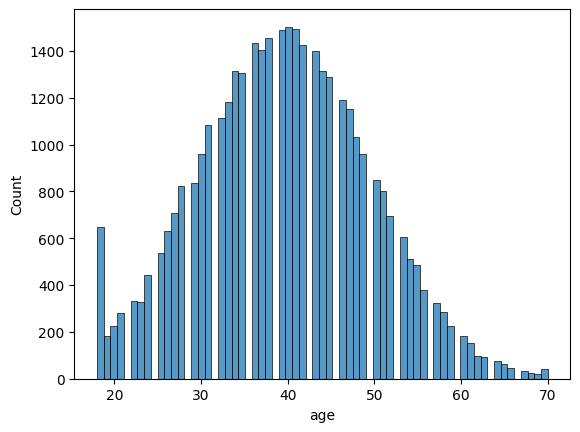

In [40]:
sns.histplot(df_train_1['age'])
plt.show()

## KDE For Age Column

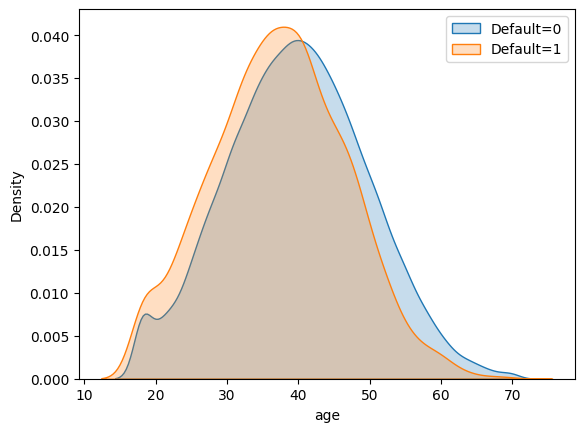

In [41]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['age'], fill=True, label = 'Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['age'], fill=True, label = 'Default=1')
plt.legend()
plt.show()


**Insights**

1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

## KDE for all columns

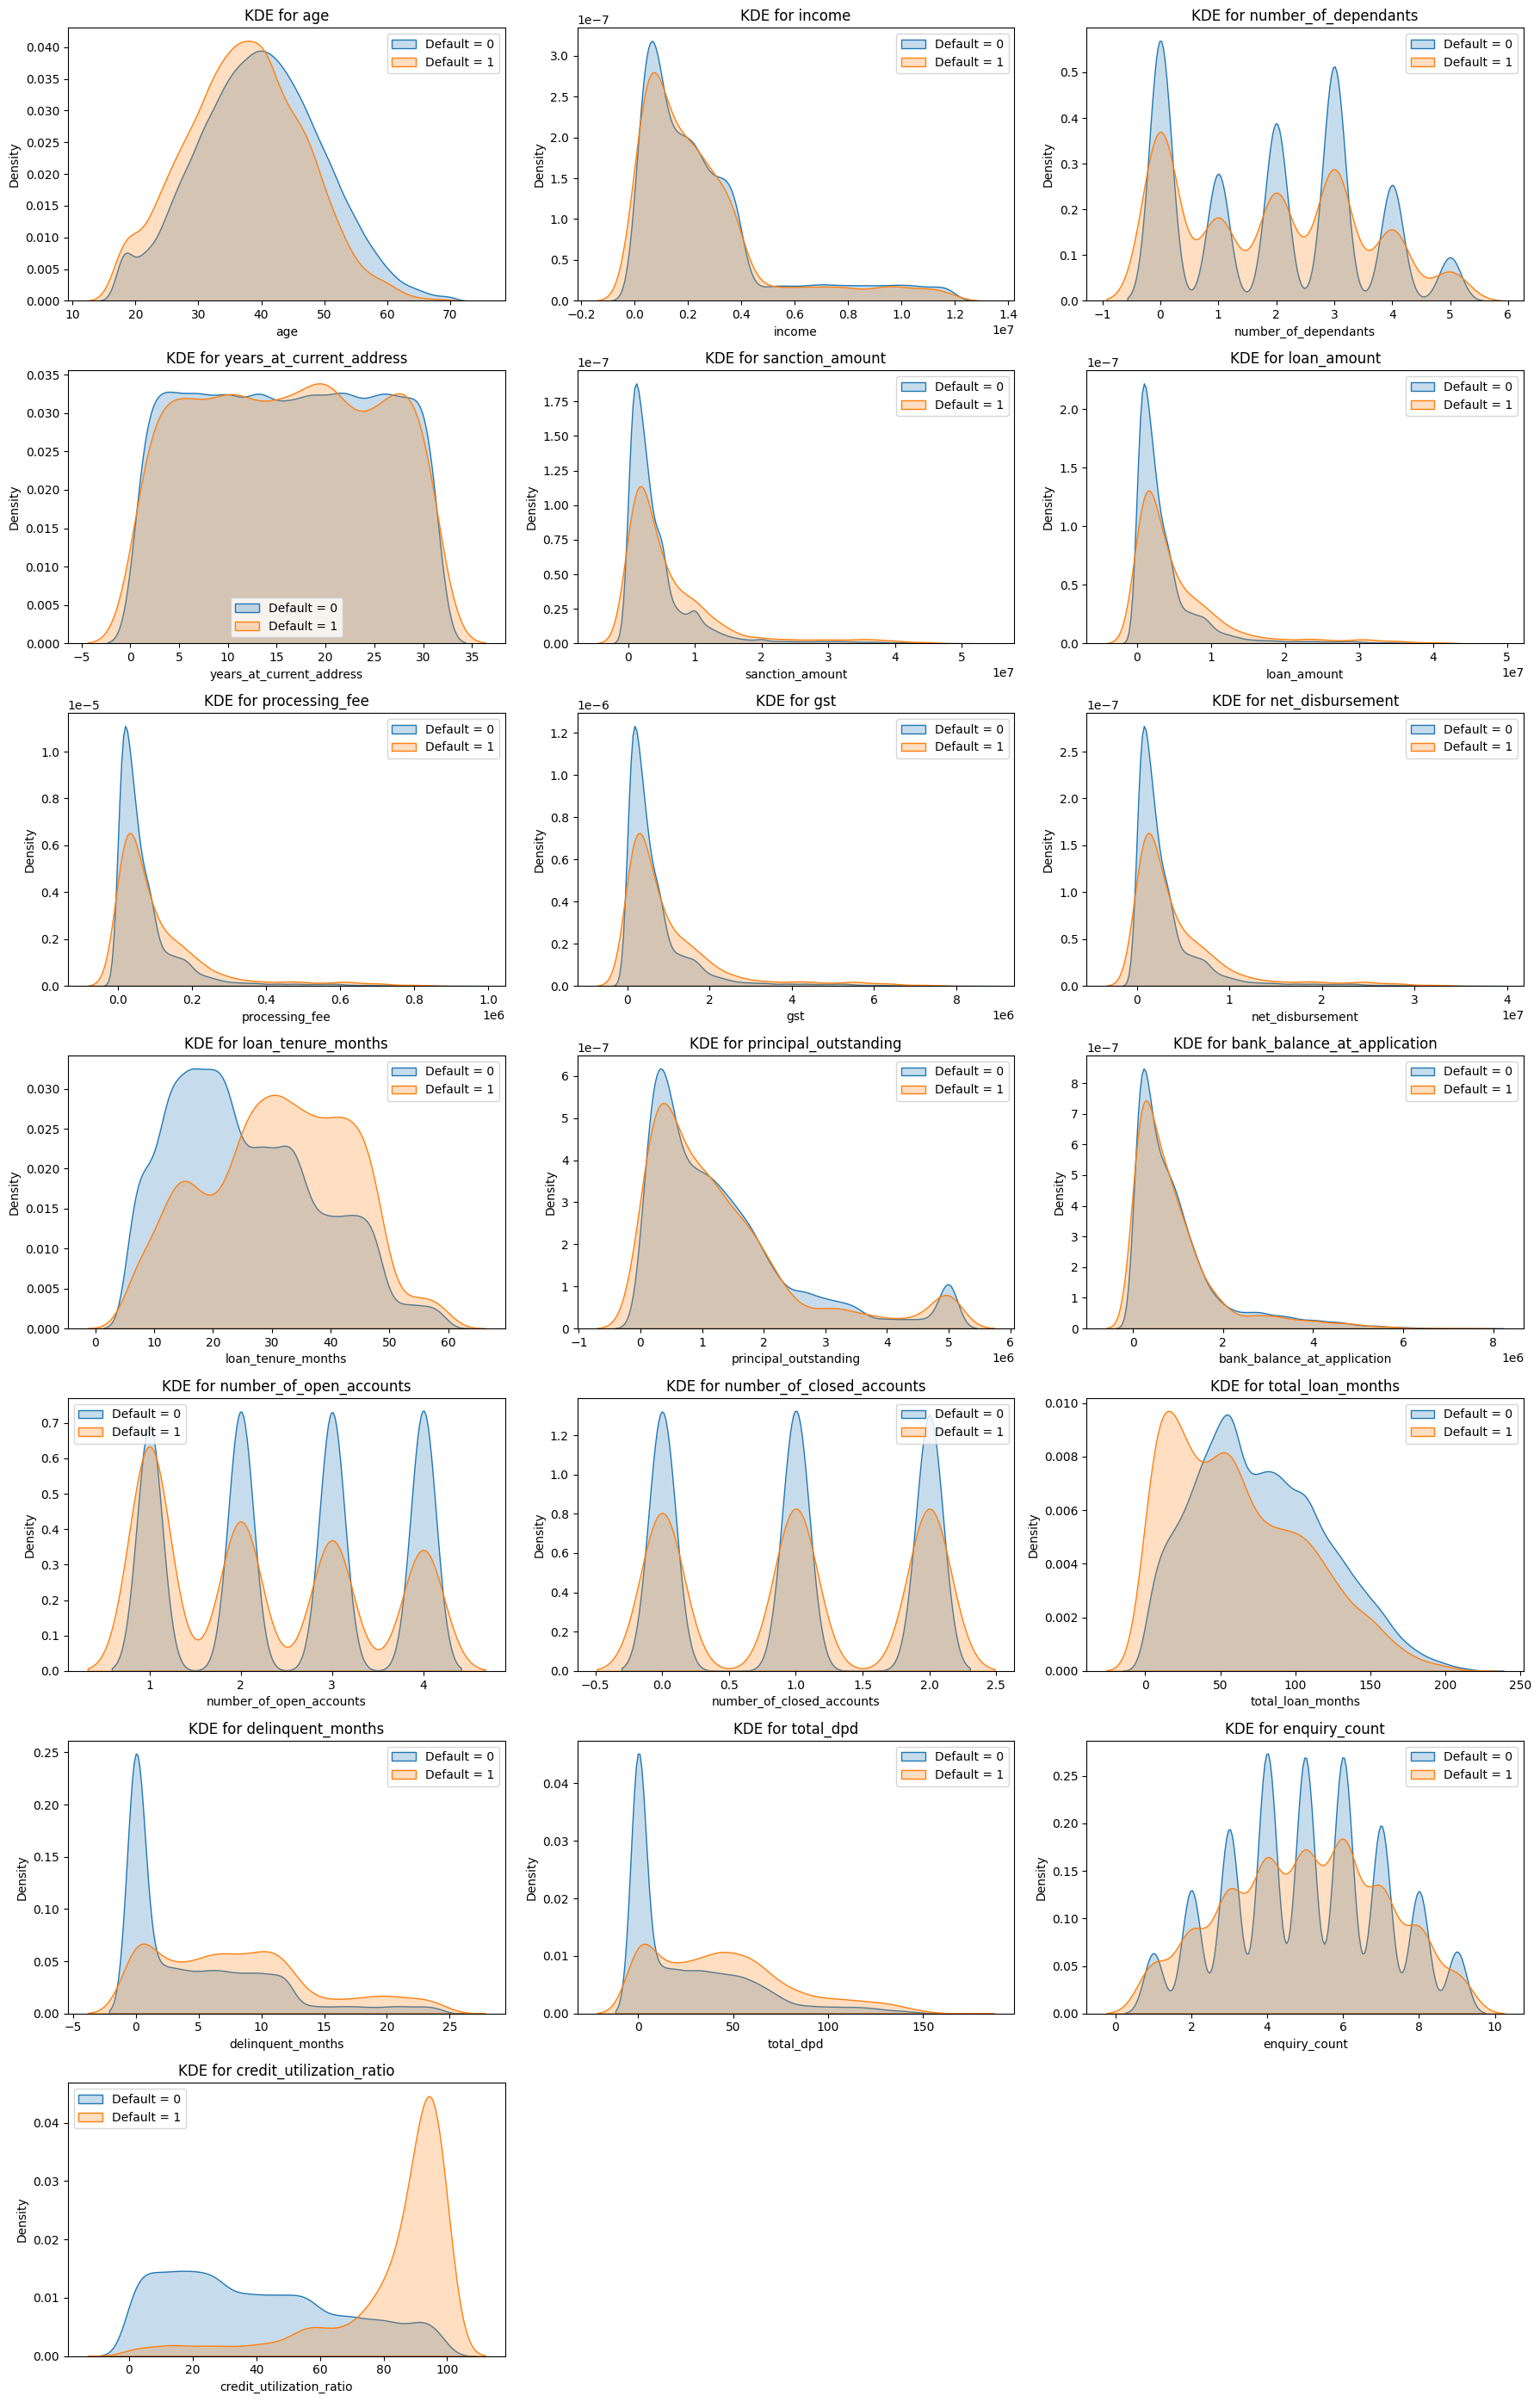

In [42]:
# Filter numeric-only columns from your list
plot_cols = [col for col in columns_continuous if df_train_1[col].dtype in ['int64', 'float64']]

# Set number of subplots (rows and columns)
n_cols = 3  # number of subplots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()  # flatten in case of multi-row layout

# Loop and plot
for i, col in enumerate(plot_cols):
    ax = axes[i]
    sns.kdeplot(df_train_1[df_train_1['default'] == 0][col].dropna(), fill=True, label='Default = 0', ax=ax)
    sns.kdeplot(df_train_1[df_train_1['default'] == 1][col].dropna(), fill=True, label='Default = 1', ax=ax)
    ax.set_title(f'KDE for {col}')
    ax.legend()

# Hide any unused subplots
for j in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

# Feature Engineering

### loan_to_income_ratio

In [43]:
df_train_1[['loan_amount', 'income']]

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000
7303,298000,272000
45124,260000,141000
...,...,...
11284,4760000,3506000
44732,5302000,3889000
38158,6570000,2420000
860,3194000,2133000


In [44]:
df_train_1['loan_to_income_ratio'] = df_train_1['loan_amount'] / df_train_1['income']
df_test_1['loan_to_income_ratio'] = df_test_1['loan_amount'] / df_test_1['income']
df_train_1[['loan_to_income_ratio']]

,loan_to_income_ratio
27434,2.896552
13400,1.084080
883,0.664130
7303,1.095588
45124,1.843972
...,...
11284,1.357673
44732,1.363332
38158,2.714876
860,1.497421


In [45]:
print(df_train_1[['loan_to_income_ratio']].isna().sum())
print(df_test_1[['loan_to_income_ratio']].isna().sum())

loan_to_income_ratio    0
dtype: int64
loan_to_income_ratio    0
dtype: int64


In [46]:
df_train_1['loan_to_income_ratio'].describe()

count    37487.000000
mean         1.554863
std          0.972901
min          0.296170
25%          0.769610
50%          1.156109
75%          2.454215
max          4.565217
Name: loan_to_income_ratio, dtype: float64

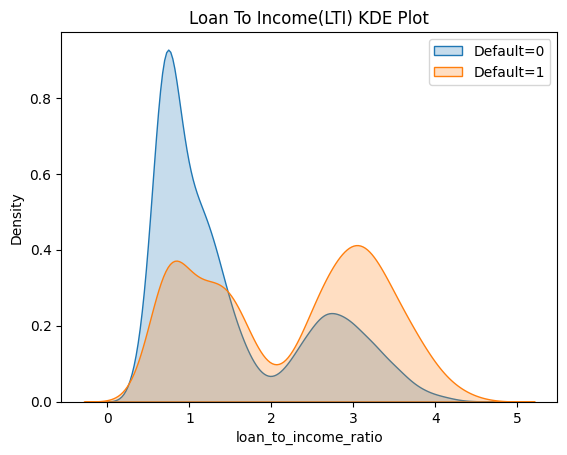

In [47]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income_ratio'], fill=True, label = 'Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income_ratio'], fill=True, label = 'Default=1')
plt.title('Loan To Income(LTI) KDE Plot')
plt.legend()
plt.show() 

### Delinquent_to_loan_month_ratio

In [48]:
df_train_1[['delinquent_months', 'total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [49]:
df_train_1['delinquent_to_loan_month_ratio'] = df_train_1['delinquent_months']*100 / df_train_1['total_loan_months'] 
df_test_1['delinquent_to_loan_month_ratio'] = df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']
df_train_1[['delinquent_to_loan_month_ratio']]

,delinquent_to_loan_month_ratio
27434,6.666667
13400,3.361345
883,16.867470
7303,0.000000
45124,9.677419
...,...
11284,17.829457
44732,0.000000
38158,0.000000
860,3.846154


In [50]:
print(df_train_1[['delinquent_to_loan_month_ratio']].isna().sum())
print(df_test_1[['delinquent_to_loan_month_ratio']].isna().sum())

delinquent_to_loan_month_ratio    0
dtype: int64
delinquent_to_loan_month_ratio    0
dtype: int64


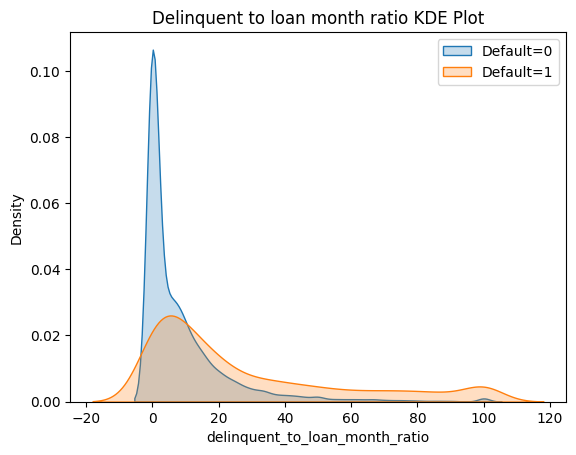

In [51]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquent_to_loan_month_ratio'], fill=True, label = 'Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquent_to_loan_month_ratio'], fill=True, label = 'Default=1')
plt.title('Delinquent to loan month ratio KDE Plot')
plt.legend()
plt.show() 

### Avg_dpd_per_delinquency

In [52]:
df_train_1['avg_dpd_per_delinquency'] = df_train_1['total_dpd'] /df_train_1['delinquent_months']
df_train_1['avg_dpd_per_delinquency'].isna().sum()


np.int64(15013)

In [53]:
df_test_1['avg_dpd_per_delinquency'] = df_test_1['total_dpd'] /df_test_1['delinquent_months']
df_test_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(4978)

In [54]:
df_train_1['avg_dpd_per_delinquency'] = np.where (
    df_train_1['delinquent_months'] != 0,
    df_train_1['total_dpd'] /df_train_1['delinquent_months'],
    0)
df_train_1['avg_dpd_per_delinquency'].isna().sum()


np.int64(0)

In [55]:
df_test_1['avg_dpd_per_delinquency'] = np.where (
    df_test_1['delinquent_months'] != 0,
    df_test_1['total_dpd'] /df_test_1['delinquent_months'],
    0)
df_test_1['avg_dpd_per_delinquency'].isna().sum()


np.int64(0)

In [56]:
df_train_1['avg_dpd_per_delinquency'].describe()

count    37487.000000
mean         3.294626
std          2.903357
min          0.000000
25%          0.000000
50%          4.333333
75%          5.750000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

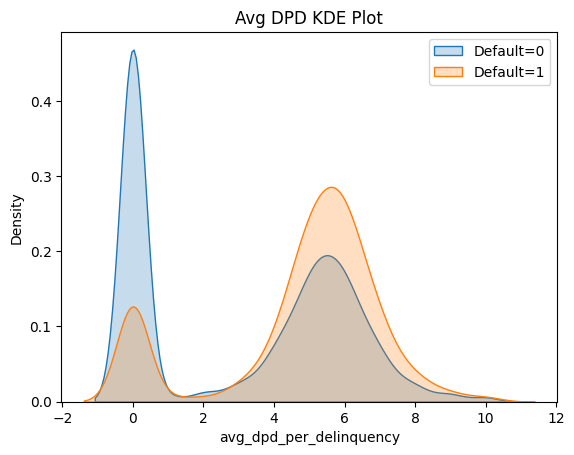

In [57]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquency'], fill=True, label = 'Default=0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquency'], fill=True, label = 'Default=1')
plt.title('Avg DPD KDE Plot')
plt.legend()
plt.show() 

## Feature Selection

In [58]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'delinquent_to_loan_month_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
df_train_2 = df_train_1.drop(columns=['cust_id', 'loan_id'], axis=1)
df_test_2 = df_test_1.drop(columns=['cust_id', 'loan_id'], axis=1)

In [60]:
df_train_3 = df_train_2.drop(columns=['income', 'delinquent_months', 'loan_amount', 'total_loan_months',   'total_dpd', 'installment_start_dt', 'disbursal_date'  ], axis=1)
df_test_3 = df_test_2.drop(columns=['income', 'delinquent_months', 'loan_amount', 'total_loan_months',   'total_dpd', 'installment_start_dt', 'disbursal_date'  ], axis=1)
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquent_to_loan_month_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             37487 non-null  int64  
 1   gender                          37487 non-null  object 
 2   marital_status                  37487 non-null  object 
 3   employment_status               37487 non-null  object 
 4   number_of_dependants            37487 non-null  int64  
 5   residence_type                  37487 non-null  object 
 6   years_at_current_address        37487 non-null  int64  
 7   city                            37487 non-null  object 
 8   state                           37487 non-null  object 
 9   zipcode                         37487 non-null  int64  
 10  loan_purpose                    37487 non-null  object 
 11  loan_type                       37487 non-null  object 
 12  sanction_amount                 3

In [62]:
df_train_3_numer = df_train_3.select_dtypes(['int64', 'float64']).columns
df_train_3_numer

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquent_to_loan_month_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

col_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_loan_month_ratio,avg_dpd_per_delinquency
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,0.523326,0.088989,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.294842,0.103945,0.329463
std,0.189510,0.307163,0.297939,0.286165,0.120709,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.227896,0.172685,0.290336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020440,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.110901,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.491525,0.049536,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.201436,0.037975,0.433333
75%,0.538462,0.600000,0.766667,0.762712,0.097660,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.505510,0.131148,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
print(X_train.shape)

(37487, 26)


In [65]:
X_test = df_test_3.drop(columns='default', axis=1)
y_test = df_test_3['default']


X_test[col_to_scale]= scaler.transform(X_test[col_to_scale])
print(X_test.shape)
X_test.describe()

(12498, 26)


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_loan_month_ratio,avg_dpd_per_delinquency
count,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000
mean,0.413678,0.386174,0.503088,0.525588,0.088840,0.082764,0.082764,0.082764,0.378690,0.263201,0.124546,0.503681,0.506961,0.503471,0.439030,0.295290,0.104143,0.330726
std,0.189011,0.306940,0.296372,0.287152,0.119051,0.111372,0.111372,0.111372,0.235128,0.245299,0.134018,0.374460,0.405600,0.255602,0.296583,0.226778,0.173989,0.290738
min,0.000000,0.000000,0.000000,0.000000,0.000019,0.000126,0.000126,0.000126,0.000000,-0.000163,0.000216,0.000000,0.000000,0.000000,0.000000,0.000989,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.021208,0.019725,0.019725,0.019725,0.188679,0.078853,0.034518,0.000000,0.000000,0.375000,0.181818,0.111475,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.049871,0.046244,0.046244,0.046244,0.358491,0.195309,0.083575,0.666667,0.500000,0.500000,0.393939,0.205120,0.037736,0.433333
75%,0.538462,0.600000,0.766667,0.762712,0.099138,0.096693,0.096693,0.096693,0.547170,0.354632,0.156611,1.000000,1.000000,0.750000,0.676768,0.505183,0.129032,0.574728
max,1.000000,1.000000,1.000000,1.000000,0.951002,1.003192,1.003192,1.003192,1.000000,1.000000,0.879450,1.000000,1.000000,1.000000,1.000000,1.006103,1.000000,1.000000


### Variance inflation factor

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_Vif(data):
    Vif_df = pd.DataFrame()
    Vif_df['variable'] = data.columns
    Vif_df['VIF'] = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
    return Vif_df


calculate_Vif(X_train[col_to_scale])

e:\Machine Learning\ml_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,age,5.717145
1,number_of_dependants,2.731678
2,years_at_current_address,3.424728
3,zipcode,3.793723
4,sanction_amount,102.154758
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.142561
9,principal_outstanding,16.279404


In [67]:
calculate_Vif(X_train[col_to_scale].drop(columns = ['processing_fee'], axis=1))

e:\Machine Learning\ml_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,age,5.717145
1,number_of_dependants,2.731678
2,years_at_current_address,3.424728
3,zipcode,3.793723
4,sanction_amount,102.154758
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.142561
8,principal_outstanding,16.279404
9,bank_balance_at_application,9.283898


In [68]:
calculate_Vif(X_train[col_to_scale].drop(columns = ['processing_fee', 'gst'], axis=1))

,variable,VIF
0,age,5.717145
1,number_of_dependants,2.731678
2,years_at_current_address,3.424728
3,zipcode,3.793723
4,sanction_amount,102.154758
5,net_disbursement,103.329787
6,loan_tenure_months,6.142561
7,principal_outstanding,16.279404
8,bank_balance_at_application,9.283898
9,number_of_open_accounts,4.350511


In [69]:
calculate_Vif(X_train[col_to_scale].drop(columns = ['processing_fee', 'gst', 'net_disbursement'], axis=1))

,variable,VIF
0,age,5.717066
1,number_of_dependants,2.731456
2,years_at_current_address,3.424232
3,zipcode,3.791473
4,sanction_amount,6.727347
5,loan_tenure_months,6.039305
6,principal_outstanding,16.168538
7,bank_balance_at_application,9.283048
8,number_of_open_accounts,4.349544
9,number_of_closed_accounts,2.362513


In [70]:
features_to_drop_VIF = calculate_Vif(X_train[col_to_scale].drop(columns = ['processing_fee', 'gst', 'net_disbursement','principal_outstanding'], axis=1))
features_to_drop_VIF

,variable,VIF
0,age,5.471892
1,number_of_dependants,2.731138
2,years_at_current_address,3.422168
3,zipcode,3.789272
4,sanction_amount,4.596775
5,loan_tenure_months,5.984444
6,bank_balance_at_application,4.190263
7,number_of_open_accounts,4.321654
8,number_of_closed_accounts,2.355137
9,enquiry_count,6.392102


In [71]:
X_train = X_train.drop(columns = ['processing_fee', 'gst', 'net_disbursement','principal_outstanding'], axis=1)
print(X_train.shape)
X_train.head(2)

(37487, 22)


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,sanction_amount,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_loan_month_ratio,avg_dpd_per_delinquency
27434,0.519231,F,Single,Salaried,0.0,Owned,0.133333,Ahmedabad,Gujarat,0.457627,...,0.065005,0.339623,0.069846,1.000000,1.0,0.875,0.595960,0.609125,0.066667,0.550
13400,0.211538,M,Single,Salaried,0.0,Owned,0.800000,Delhi,Delhi,0.000000,...,0.058191,0.509434,0.119061,0.666667,0.5,0.375,0.929293,0.184564,0.033613,0.425


In [72]:
num_col = X_train.select_dtypes(['int64', 'float64']).columns
num_col

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_loan_month_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [73]:
Vif_df = calculate_Vif(X_train[num_col])
Vif_df

,variable,VIF
0,age,5.471892
1,number_of_dependants,2.731138
2,years_at_current_address,3.422168
3,zipcode,3.789272
4,sanction_amount,4.596775
5,loan_tenure_months,5.984444
6,bank_balance_at_application,4.190263
7,number_of_open_accounts,4.321654
8,number_of_closed_accounts,2.355137
9,enquiry_count,6.392102


In [74]:
selected_numerical_features = Vif_df.variable.values
selected_numerical_features

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_tenure_months',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'delinquent_to_loan_month_ratio', 'avg_dpd_per_delinquency'],
      dtype=object)

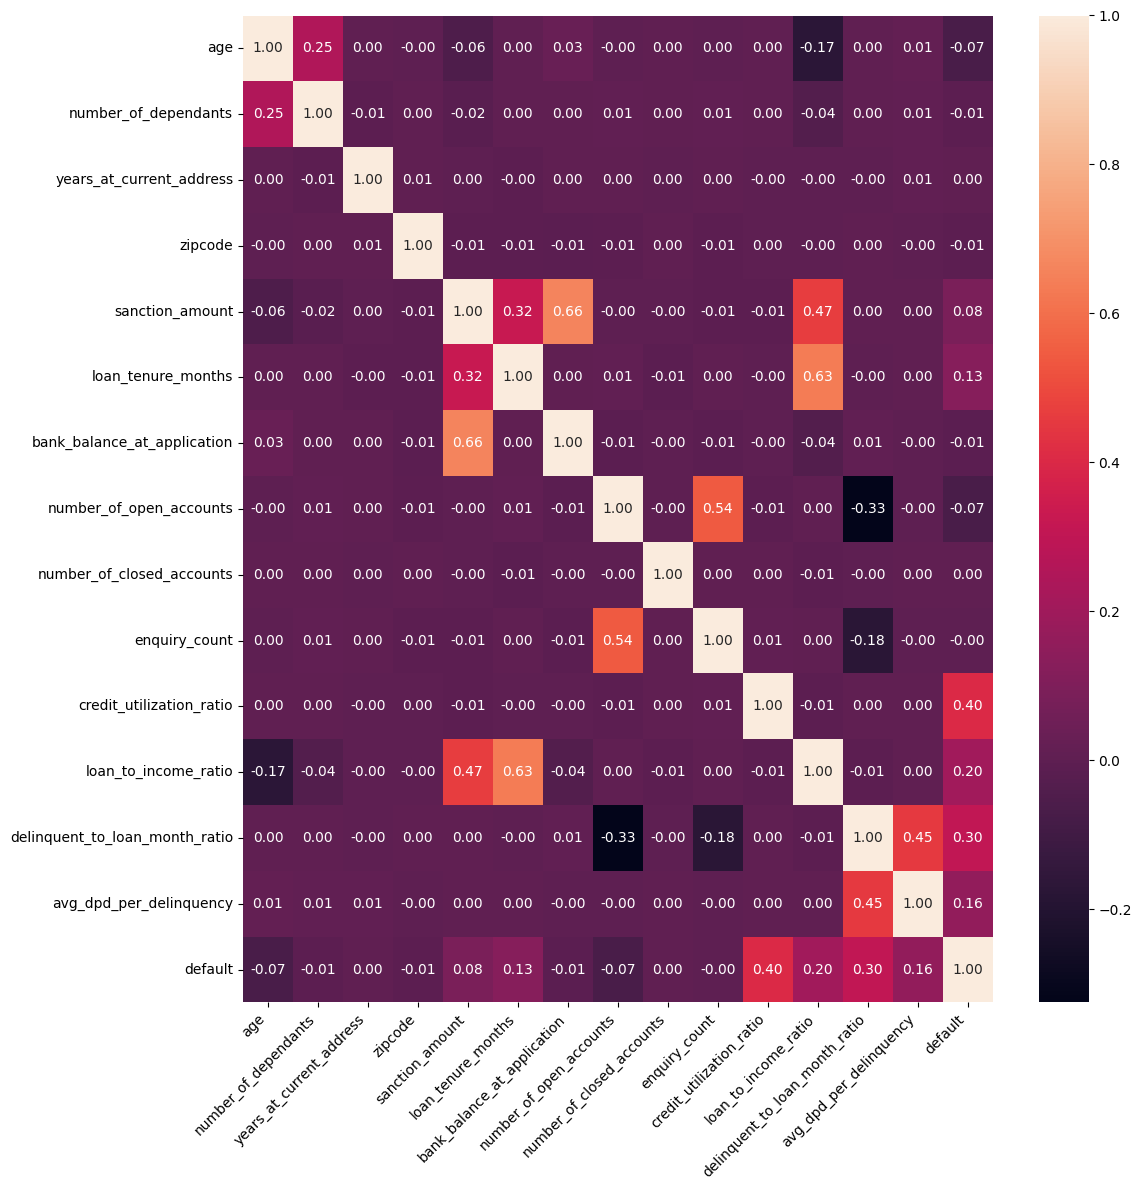

In [75]:
plt.figure(figsize=(12,12))
cm = df_train_3[num_col.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [76]:
X_train_1 = X_train[num_col]
X_train_1['default'] = df_train_3['default']
X_train_1.head(2)

C:\Users\joyal\AppData\Local\Temp\ipykernel_9580\2346524916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['default'] = df_train_3['default']


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquent_to_loan_month_ratio,avg_dpd_per_delinquency,default
27434,0.519231,0.0,0.133333,0.457627,0.065005,0.339623,0.069846,1.000000,1.0,0.875,0.595960,0.609125,0.066667,0.550,0
13400,0.211538,0.0,0.800000,0.000000,0.058191,0.509434,0.119061,0.666667,0.5,0.375,0.929293,0.184564,0.033613,0.425,0


In [77]:
correlation = X_train_1.corr()
correlation['default']


age                              -0.071557
number_of_dependants             -0.008981
years_at_current_address          0.001491
zipcode                          -0.005787
sanction_amount                   0.083940
loan_tenure_months                0.125066
bank_balance_at_application      -0.014257
number_of_open_accounts          -0.070778
number_of_closed_accounts         0.004492
enquiry_count                    -0.001817
credit_utilization_ratio          0.400162
loan_to_income_ratio              0.204051
delinquent_to_loan_month_ratio    0.303469
avg_dpd_per_delinquency           0.159948
default                           1.000000
Name: default, dtype: float64

## Feature Selection: Categorical Columns

In [78]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             37487 non-null  float64
 1   gender                          37487 non-null  object 
 2   marital_status                  37487 non-null  object 
 3   employment_status               37487 non-null  object 
 4   number_of_dependants            37487 non-null  float64
 5   residence_type                  37487 non-null  object 
 6   years_at_current_address        37487 non-null  float64
 7   city                            37487 non-null  object 
 8   state                           37487 non-null  object 
 9   zipcode                         37487 non-null  float64
 10  loan_purpose                    37487 non-null  object 
 11  loan_type                       37487 non-null  object 
 12  sanction_amount                 3

In [80]:
temp = pd.concat([X_train, y_train], axis = 1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum']) # count is total no.of values in auto and sum means default = 0 that means good values

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [81]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target ].agg(['count', 'sum'])
    grouped = grouped.rename(columns = {'count' : 'Total', 'sum' : 'Default = 1(Good)'})
    grouped['Default = 0(Bad)'] = grouped['Total'] - grouped['Default = 1(Good)']

    total_good = grouped['Default = 1(Good)'].sum()
    total_bad = grouped['Default = 0(Bad)'].sum()

    grouped['Good_percent'] = grouped['Default = 1(Good)'] / total_good
    grouped['Bad_percent'] = grouped['Default = 0(Bad)'] / total_bad
    
    grouped['WOE'] = np.log(grouped['Good_percent'] /  grouped['Bad_percent'])

    grouped['IV'] = grouped['WOE']*(grouped['Good_percent'] - grouped['Bad_percent'])

    grouped['WOE'] = grouped['WOE'].replace([np.inf, -np.inf], 0) # If we get infinite value replace them with 0
    grouped['IV'] = grouped['IV'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['IV'].sum()

    return grouped, total_iv
    


grouped, total_iv = calculate_woe_iv(pd.concat([X_train, y_train], axis = 1), 'loan_purpose', 'default')

grouped

,Total,Default = 1(Good),Default = 0(Bad),Good_percent,Bad_percent,WOE,IV
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098463,0.207680,-0.746312,0.081509
Education,5626,546,5080,0.171214,0.148114,0.144932,0.003348
Home,11271,1744,9527,0.546880,0.277771,0.677431,0.182303
Personal,13153,585,12568,0.183443,0.366435,-0.691918,0.126616


In [82]:
total_iv

np.float64(0.39377543144164784)

In [83]:
IV_values = {}


for feature in X_train.columns:
    # Categorical variables
    if X_train[feature].dtype == 'object':
        _, IV = calculate_woe_iv(pd.concat([X_train, y_train], axis = 1), feature, 'default')
        IV_values[feature] = IV
    # Numeric variables
    else:
        # Bin the numerical feature
        X_binned = pd.cut(X_train[feature], bins =10, labels = False) # once bins is created then we can use iv for categorical columns
        _, IV = calculate_woe_iv(pd.concat([X_binned, y_train], axis = 1), feature, 'default')
    IV_values[feature] = IV

IV_values


{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'sanction_amount': np.float64(0.1067215843237773),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.422822

In [84]:

# Convert dictionary to DataFrame
iv_df = pd.DataFrame(list(IV_values.items()), columns=['Feature', 'IV'])

# Sort by IV value (optional, but helpful)
iv_df = iv_df.sort_values(by='IV', ascending=False).reset_index(drop=True)

# Display
iv_df

,Feature,IV
0,credit_utilization_ratio,2.422823
1,delinquent_to_loan_month_ratio,0.678323
2,loan_to_income_ratio,0.491740
3,avg_dpd_per_delinquency,0.421236
4,loan_purpose,0.393775
5,residence_type,0.259402
6,loan_tenure_months,0.234506
7,loan_type,0.173047
8,sanction_amount,0.106722
9,age,0.075927


In [85]:
selected_faetures_iv = iv_df[iv_df['IV'] > 0.02].reset_index(drop=True)
selected_faetures_iv

,Feature,IV
0,credit_utilization_ratio,2.422823
1,delinquent_to_loan_month_ratio,0.678323
2,loan_to_income_ratio,0.491740
3,avg_dpd_per_delinquency,0.421236
4,loan_purpose,0.393775
5,residence_type,0.259402
6,loan_tenure_months,0.234506
7,loan_type,0.173047
8,sanction_amount,0.106722
9,age,0.075927


In [86]:
selected_features = selected_faetures_iv['Feature'].tolist()
selected_features


['credit_utilization_ratio',
 'delinquent_to_loan_month_ratio',
 'loan_to_income_ratio',
 'avg_dpd_per_delinquency',
 'loan_purpose',
 'residence_type',
 'loan_tenure_months',
 'loan_type',
 'sanction_amount',
 'age',
 'number_of_open_accounts']

In [87]:
X_train[selected_features]

,credit_utilization_ratio,delinquent_to_loan_month_ratio,loan_to_income_ratio,avg_dpd_per_delinquency,loan_purpose,residence_type,loan_tenure_months,loan_type,sanction_amount,age,number_of_open_accounts
27434,0.595960,0.066667,0.609125,0.550000,Home,Owned,0.339623,Secured,0.065005,0.519231,1.000000
13400,0.929293,0.033613,0.184564,0.425000,Auto,Owned,0.509434,Secured,0.058191,0.211538,0.666667
883,0.838384,0.168675,0.086193,0.557143,Personal,Mortgage,0.245283,Unsecured,0.042550,0.615385,0.333333
7303,0.343434,0.000000,0.187259,0.000000,Auto,Owned,0.283019,Secured,0.004529,0.480769,0.000000
45124,0.191919,0.096774,0.362564,0.466667,Education,Owned,0.735849,Secured,0.004069,0.250000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
11284,0.939394,0.178295,0.248651,0.547826,Auto,Rented,0.245283,Secured,0.098457,0.288462,1.000000
44732,0.232323,0.000000,0.249977,0.000000,Auto,Owned,0.113208,Secured,0.102276,0.288462,0.666667
38158,0.535354,0.000000,0.566568,0.000000,Home,Rented,0.792453,Secured,0.156245,0.326923,0.000000
860,0.171717,0.038462,0.281386,0.480000,Education,Owned,0.301887,Secured,0.070705,0.461538,0.666667


## Feature Encoding

In [88]:
X_train_encoded = pd.get_dummies(X_train[selected_features], drop_first= True)
X_test_encoded = pd.get_dummies(X_test[selected_features], drop_first= True)
print(X_train_encoded.shape)
X_train_encoded.head(2)

(37487, 14)


,credit_utilization_ratio,delinquent_to_loan_month_ratio,loan_to_income_ratio,avg_dpd_per_delinquency,loan_tenure_months,sanction_amount,age,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
27434,0.595960,0.066667,0.609125,0.550,0.339623,0.065005,0.519231,1.000000,False,True,False,True,False,False
13400,0.929293,0.033613,0.184564,0.425,0.509434,0.058191,0.211538,0.666667,False,False,False,True,False,False


# Model Training

**Attempt 1**

1. Logistic Regression, RandomForest, XGB
2. No handling & class imbalance

### Model 1: Logistic Regression

In [97]:
start = time.time()
model = LogisticRegression()

model.fit(X_train_encoded, y_train)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498

Accuracy : 0.9612738038086094, time : 0.1430041790008545 sec


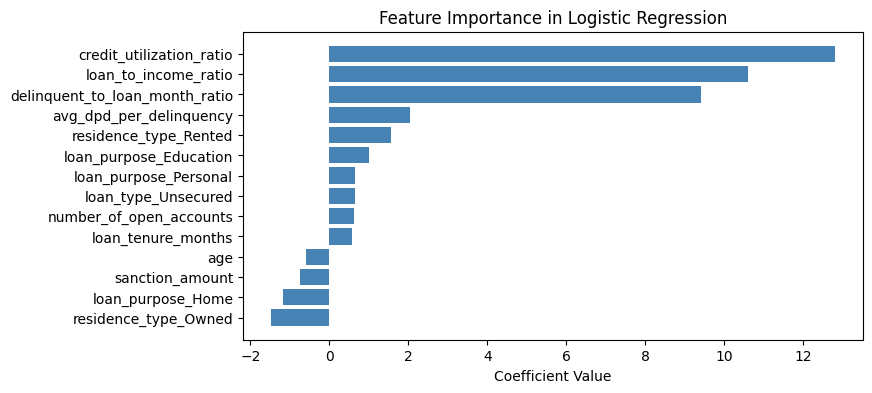

In [90]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Model 2 : RandomForestClassifier

In [96]:
start = time.time()
model = RandomForestClassifier()

model.fit(X_train_encoded, y_train)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.86      0.69      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498

Accuracy : 0.9624739958393342, time : 4.149085283279419 sec


### Model 3: XGBoost

In [95]:
start = time.time()
model = XGBClassifier()
end = time.time()
model.fit(X_train_encoded, y_train)

end = time.time()
score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.82      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498

Accuracy : 0.9627940470475276, time : 0.2919943332672119 sec


### Model 4 : Decision Tree

In [94]:
start = time.time()

model = DecisionTreeClassifier()

model.fit(X_train_encoded, y_train)

end = time.time()
score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11390
           1       0.70      0.69      0.69      1108

    accuracy                           0.95     12498
   macro avg       0.83      0.83      0.83     12498
weighted avg       0.95      0.95      0.95     12498

Accuracy : 0.9455912946071371, time : 0.2230844497680664 sec


#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(3792.690190732246)}
Best Score: 0.7631386473239473
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.72      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [99]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7944161860307553
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.81      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.89      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [102]:
y_train.value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [101]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)

y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [103]:
start = time.time()
model = LogisticRegression()

model.fit(X_train_rus, y_train_rus)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.94      0.82     12498
weighted avg       0.95      0.92      0.93     12498

Accuracy : 0.9212674027844455, time : 0.13899540901184082 sec


In [104]:
start = time.time()
model = XGBClassifier()

model.fit(X_train_rus, y_train_rus)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.58      0.96      0.72      1108

    accuracy                           0.93     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498

Accuracy : 0.9344695151224196, time : 0.31618666648864746 sec


### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [105]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train_encoded, y_train)
y_tomek.value_counts()

default
0    34241
1    34241
Name: count, dtype: int64

In [106]:
start = time.time()
model = LogisticRegression()

model.fit(X_tomek, y_tomek)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498

Accuracy : 0.9313490158425348, time : 0.25551700592041016 sec


In [109]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

e:\Machine Learning\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [111]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_tomek, y_tomek, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-04-07 11:43:12,461] A new study created in memory with name: no-name-4301c386-9ca9-44f2-bf08-34850f601173
[I 2025-04-07 11:43:24,064] Trial 0 finished with value: 0.9435232356773385 and parameters: {'C': 0.30099012797531405, 'solver': 'saga', 'tol': 0.00012781353124430186, 'class_weight': None}. Best is trial 0 with value: 0.9435232356773385.
[I 2025-04-07 11:43:26,188] Trial 1 finished with value: 0.9454433596236251 and parameters: {'C': 202.85863117408465, 'solver': 'saga', 'tol': 0.011364588560266729, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9454433596236251.
[I 2025-04-07 11:43:28,566] Trial 2 finished with value: 0.9437285980520208 and parameters: {'C': 0.3303341620663808, 'solver': 'lbfgs', 'tol': 2.3235191734018765e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9454433596236251.
[I 2025-04-07 11:43:29,217] Trial 3 finished with value: 0.9447406857099324 and parameters: {'C': 0.7919943374536963, 'solver': 'newton-cg', 'tol': 0.0003987234

In [113]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_tomek, y_tomek)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9455171654780988
  Params: 
    C: 4273.71204437441
    solver: liblinear
    tol: 0.009050585636869788
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [107]:
start = time.time()
model = XGBClassifier()

model.fit(X_tomek, y_tomek)

score = model.score(X_test_encoded, y_test)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

end = time.time()

print(report)
print(f'Accuracy : {score}, time : {end - start} sec')

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.74      0.82      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498

Accuracy : 0.9587133941430629, time : 0.4189949035644531 sec


In [114]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_tomek, y_tomek, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-04-07 11:46:32,112] A new study created in memory with name: no-name-64aa5d86-b24b-41fd-af2f-8edd32469fd6
[I 2025-04-07 11:46:34,131] Trial 0 finished with value: 0.9569815957025667 and parameters: {'lambda': 5.374710524678245, 'alpha': 5.450894026672593, 'subsample': 0.9082429970159619, 'colsample_bytree': 0.5603246235868663, 'max_depth': 6, 'eta': 0.1269772323121997, 'gamma': 2.3620295611993978, 'scale_pos_weight': 4.224075497143355, 'min_child_weight': 2, 'max_delta_step': 6}. Best is trial 0 with value: 0.9569815957025667.
[I 2025-04-07 11:46:35,599] Trial 1 finished with value: 0.9659615198882134 and parameters: {'lambda': 0.7034396414105295, 'alpha': 0.006507384949915598, 'subsample': 0.6848911422412913, 'colsample_bytree': 0.7048419513174646, 'max_depth': 7, 'eta': 0.2721604402595079, 'gamma': 8.682656854879164, 'scale_pos_weight': 3.2843907579571066, 'min_child_weight': 9, 'max_delta_step': 8}. Best is trial 1 with value: 0.9659615198882134.
[I 2025-04-07 11:46:37,634] 

In [115]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_tomek, y_tomek)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9758273327341834
  Params: 
    lambda: 0.006711496029058168
    alpha: 0.003790794598414602
    subsample: 0.47724978794925205
    colsample_bytree: 0.7166345295941751
    max_depth: 10
    eta: 0.2792920234063361
    gamma: 0.42103667497890285
    scale_pos_weight: 2.0054278414033693
    min_child_weight: 5
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.72      0.83      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.90      0.87     12498
weighted avg       0.96      0.96      0.96     12498



## Model Evaluation : ROC/AUC

In [116]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [117]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05]),
 array([0.        , 0.00090253, 0.19314079, 0.19314079, 0.28429603]),
 array([       inf, 0.99999979, 0.99843117, 0.9984292 , 0.995905  ]))

In [118]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9831436626593091)

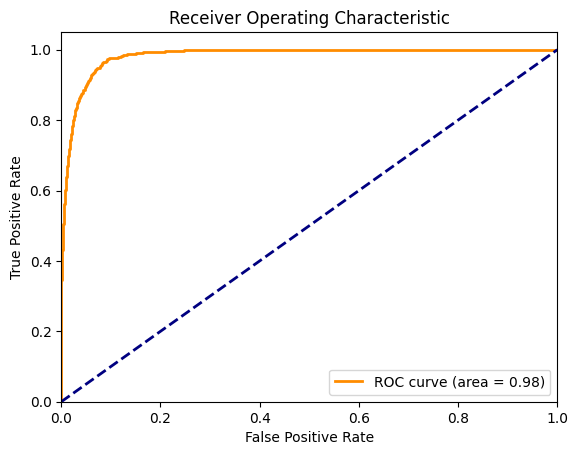

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()